# **PART A: Predicting Signal Quality Using Machine Learning**

## **Domain: Electronics and Telecommunication**

### **Context**
A communications equipment manufacturing company has a product responsible for emitting informative signals. The company wants to build a machine learning model that can predict the equipment’s signal quality based on various measurable parameters.

### **Data Description**
The dataset contains information on multiple signal tests performed, including:
- **Parameters**: Various measurable signal attributes.
- **Signal_Quality**: The final signal strength or quality.

### **Project Objective**
To develop a classification model that can accurately predict signal quality based on the provided signal parameters.

---


In [222]:
# !!pip install tensorflow-gpu
# !!pip install scikeras
# !!pip install --no-cache-dir --force-reinstall scikit-learn==1.5.2


### Importing Libraries

In [223]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier
import random
from tensorflow.keras import backend
from tensorflow.keras import layers
from tensorflow.keras import optimizers, losses
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler

%matplotlib inline
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
# Preventing scientific notation.
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [224]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
path='/content/drive/MyDrive/Python Course/neural network'

In [226]:
#  store pellete for future use
pellete='Set2'
colors = sns.color_palette(pellete)  # Get Set2 color palette for future use
sns.set(style="darkgrid") # Set grid style

#### Part A - Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.


In [227]:
# read dataset
df = pd.read_csv(f'{path}/NN Project Data - Signal.csv')
signal_df=df.copy(deep=True)


In [228]:
# Showing first 5 records
signal_df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0        7.400        0.700        0.000        1.900        0.076   
1        7.800        0.880        0.000        2.600        0.098   
2        7.800        0.760        0.040        2.300        0.092   
3       11.200        0.280        0.560        1.900        0.075   
4        7.400        0.700        0.000        1.900        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0       11.000       34.000        0.998        3.510         0.560   
1       25.000       67.000        0.997        3.200         0.680   
2       15.000       54.000        0.997        3.260         0.650   
3       17.000       60.000        0.998        3.160         0.580   
4       11.000       34.000        0.998        3.510         0.560   

   Parameter 11  Signal_Strength  
0         9.400                5  
1         9.800                5  
2         9.800                5  
3         9.800                6  
4         9.400                5

In [229]:
# Checking Data
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [230]:
#Shape of df
signal_df.shape

(1599, 12)

#### Part A - Q1 B - Check for missing values and print percentage for each attribute.


In [231]:
# Check for missing values
signal_df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [232]:
# Check for missing values percentage
signal_df.isnull().sum()*100/len(signal_df)

Parameter 1       0.000
Parameter 2       0.000
Parameter 3       0.000
Parameter 4       0.000
Parameter 5       0.000
Parameter 6       0.000
Parameter 7       0.000
Parameter 8       0.000
Parameter 9       0.000
Parameter 10      0.000
Parameter 11      0.000
Signal_Strength   0.000
dtype: float64

#### Check Unique records across all columns

In [233]:
# Chevk unique values in each columns
columns=signal_df.columns
for col in columns:
  print(col)
  print(signal_df[col].nunique())



Parameter 1
96
Parameter 2
143
Parameter 3
80
Parameter 4
91
Parameter 5
153
Parameter 6
60
Parameter 7
144
Parameter 8
436
Parameter 9
89
Parameter 10
96
Parameter 11
65
Signal_Strength
6


In [234]:
#  Show unique values in target column
signal_df['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

#### Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.


In [235]:
# Show duplicate rows in the dataframe
signal_df[signal_df.duplicated()]

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4           7.400        0.700        0.000        1.900        0.076   
11          7.500        0.500        0.360        6.100        0.071   
27          7.900        0.430        0.210        1.600        0.106   
40          7.300        0.450        0.360        5.900        0.074   
65          7.200        0.725        0.050        4.650        0.086   
...           ...          ...          ...          ...          ...   
1563        7.200        0.695        0.130        2.000        0.076   
1564        7.200        0.695        0.130        2.000        0.076   
1567        7.200        0.695        0.130        2.000        0.076   
1581        6.200        0.560        0.090        1.700        0.053   
1596        6.300        0.510        0.130        2.300        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4          11.000       34.000        0.998        3.510         0.560   
11         17.000      102.000        0.998        3.350         0.800   
27         10.000       37.000        0.997        3.170         0.910   
40         12.000       87.000        0.998        3.330         0.830   
65          4.000       11.000        0.996        3.410         0.390   
...           ...          ...          ...          ...           ...   
1563       12.000       20.000        0.995        3.290         0.540   
1564       12.000       20.000        0.995        3.290         0.540   
1567       12.000       20.000        0.995        3.290         0.540   
1581       24.000       32.000        0.994        3.540         0.600   
1596       29.000       40.000        0.996        3.420         0.750   

      Parameter 11  Signal_Strength  
4            9.400                5  
11          10.500                5  
27           9.500                5  
40          10.500                5  
65          10.900                5  
...            ...              ...  
1563        10.100                5  
1564        10.100                5  
1567        10.100                5  
1581        11.300                5  
1596        11.000                6  

[240 rows x 12 columns]

In [236]:
# dropping duplicate values .We will keep the first one and drop the redudant
signal_df.drop_duplicates(keep='first',inplace=True)
signal_df[signal_df.duplicated()]

Empty DataFrame
Columns: [Parameter 1, Parameter 2, Parameter 3, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 8, Parameter 9, Parameter 10, Parameter 11, Signal_Strength]
Index: []

In [237]:
# After Dropping duplicate values
signal_df.shape

(1359, 12)

### Utils

In [238]:
def plot_histogram_and_boxplot(df, column, xlabel, ylabel, title):
    """
    Plots a histogram with KDE and a box plot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the plots are to be drawn.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title for the graph.
    Returns:
    None
    """
    # Calculate percentiles
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.50)
    q75 = df[column].quantile(0.75)
    mean_value = df[column].mean()
    # Create the figure and set the size
    f, (hist, box) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

    # Create the histogram with KDE
    sns.histplot(data=df, x=column, ax=hist, kde=True, legend=True, color='lightcoral')
    hist.set_xlabel(xlabel)
    hist.axvline(mean_value, color='peru', linestyle=':', label='Mean')
    hist.axvline(q25, color='green', linestyle='--', label='25th percentile')
    hist.axvline(q50, color='blue', linestyle='-', label='50th percentile (Median)')
    hist.axvline(q75, color='purple', linestyle='--', label='75th percentile')
    hist.set_ylabel(ylabel)
    hist.legend()

    # Create the box plot in a subplot below the histogram
    sns.boxplot(data=df, x=column, ax=box, color='lightcoral')
    box.axvline(mean_value, color='peru', linestyle=':', label=f'Mean: {mean_value:.2f}')
    box.axvline(q25, color='green', linestyle='--', label=f'25th percentile: {q25:.2f}')
    box.axvline(q50, color='blue', linestyle='-', label=f'50th percentile: {q50:.2f}')
    box.axvline(q75, color='purple', linestyle='--', label=f'75th percentile: {q75:.2f}')

    # Setting the x-label and title on the shared axis and figure
    box.set_xlabel(xlabel)
    f.suptitle(title)

    # Adjust layout and show the combined plots
    f.tight_layout(rect=[0, 0, 1, 0.95])
    box.legend()  # Add legend to the box plot for the percentiles


In [239]:
def draw_count_plot(df, x, xlabel, ylabel, title, hue=None):
    """
    Draws a count plot for a specified column in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - title (str): The title for the plot.
    - hue (str, optional): The column name to be used for hue (categorical separation). Default is None.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Create the plot
    count=df[x].nunique()
    plt.figure(figsize=(count + 1, 4))
    ax = sns.countplot(data=df, x=x, hue=hue, palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


    return plt

In [240]:
def annotate_chart(plot, ax):
    """
    Annotates a chart with the height of each bar.

    Parameters:
    - plot (matplotlib.pyplot): The matplotlib plot object.
    - ax (Axes): The Axes object to annotate.
    """
    for p in ax.patches:
        height = p.get_height()

        # Only annotate if height is significant, and avoid zero or near-zero annotations
        if height > 0.001:
            plot.annotate(f'{format(height, ".1f")}% ',          # Annotate with 1 decimal places
                          (p.get_x() + p.get_width() / 2., height),  # Position the annotation at the top of the bar
                          ha='center', va='center',       # Center the annotation
                          xytext=(0, 4),                  # Small offset to avoid overlapping with the bar
                          textcoords='offset points')


In [241]:
def plot_boxplot(df, x_col, y_col, hue_col=None, title=None, xlabel=None, figsize=(8, 5), xticks_rotation=90):
    """
    Creates a box plot to visualize the relationship between variables.

    Parameters:
    - df: pandas DataFrame containing the data.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the y-axis.
    - hue_col: str, column name for grouping by color (optional).
    - title: str, title of the plot (optional).
    - xlabel: str, label for the x-axis (optional).
    - figsize: tuple, size of the figure (default is (8, 5)).
    - xticks_rotation: int, rotation angle for x-axis tick labels (default is 90).
      Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object with annotations.
    """

    plt.figure(figsize=figsize)  # Set the figure size
    bxp = sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col,palette="Set2")  # Create the box plot

    if xlabel:
        bxp.set_xlabel(xlabel)  # Set x-axis label if provided
    if title:
        bxp.axes.set_title(title)  # Set the plot title if provided

    plt.xticks(rotation=xticks_rotation)  # Rotate x-axis labels
    return plt


In [242]:
def draw_box_plot_with_legend(df, x, xlabel, color='red'):
    """
    Draws a box plot with a vertical line indicating the mean value and includes a legend.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    mean_value = df[x].mean()
    sns.boxplot(data=df, x=x, color=color)
    plt.xlabel(xlabel)
    plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
    plt.legend()
    return plt

In [243]:
def plot_box_plot_side_by_side(df, x, xlabel, category_col, color='red'):
    """
    Plots side-by-side box plots for different categories in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - category_col (str): The column name in the DataFrame used to categorize the data.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    # Extract unique categories
    categories = df[category_col].unique()

    # Create subplots with 1 row and the number of columns equal to the number of categories
    fig, axes = plt.subplots(1, len(categories), figsize=(12, 6))

    # Loop over each category and plot
    for i, category in enumerate(categories):
        plt.sca(axes[i])  # Set the current axes
        subset = df[df[category_col] == category]
        draw_box_plot_with_legend(subset, x, xlabel, color=color)
        axes[i].set_title(f'{category.capitalize()}')

    plt.tight_layout()
    return plt

In [244]:
def fit(model, X_train, y_train, X_test, y_test, NoOfEpochs, batch_size, verbose=1):
    """
    Trains the neural network model and evaluates its performance.

    Parameters:
    - model: Keras model to be trained.
    - X_train: Training features (numpy array or DataFrame).
    - y_train: Training labels (numpy array or DataFrame).
    - X_test: Testing features (numpy array or DataFrame).
    - y_test: Testing labels (numpy array or DataFrame).
    - NoOfEpochs: Number of training epochs (int).
    - batch_size: Batch size for training (int).
    - verbose: Verbosity mode (int, default: 1).

    Returns:
    - history: Training history object containing loss and accuracy metrics.
    - test_accuracy: Final test accuracy after evaluation.
    """

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=NoOfEpochs, batch_size=batch_size, verbose=verbose)

    # Evaluate the model on test data
    test_accuracy = model.evaluate(X_test, y_test, verbose=1)

    # Store the test accuracy inside the model instance
    model.test_accuracy = test_accuracy


    return history


In [245]:
def plot_model_accuracy(history, model):
    """
    Plots the accuracy and loss trends over epochs for a trained neural network.

    Parameters:
    - history: Keras History object containing training metrics.
    - model: Trained Keras model with a stored test accuracy.

    Displays:
    - Subplot 1: Training & Validation Accuracy vs. Epochs
    - Subplot 2: Training & Validation Loss vs. Epochs
    """

    h1 = history.history  # Extract training history

    plt.figure(figsize=(15,6))

    # Plot Accuracy
    plt.subplot(1,2,1)
    sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label="Val_accuracy", color="blue")
    sns.lineplot(y=h1['accuracy'], x=range(len(h1['accuracy'])), label="Accuracy", color="green")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"Epochs Vs Accuracy (Acc = {model.test_accuracy})")

    # Plot Loss
    plt.subplot(1,2,2)
    sns.lineplot(y=h1['val_loss'], x=range(len(h1['val_loss'])), label="Val_Loss", color="red")
    sns.lineplot(y=h1['loss'], x=range(len(h1['loss'])), label="Loss", color="orange")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Epochs Vs Loss (Acc = {model.test_accuracy})")

    plt.show()


In [246]:
def build_sequential_model(model, inputDimensions, noOfClasses, layerRepeatCount, layerNeuronCount, dropout_rate=0.0, optimizer_type='sgd'):
    """
    Builds a sequential multi-layer neural network model.

    Parameters:
    - model: Keras Sequential model instance to which layers will be added.
    - inputDimensions: Number of input features (int).
    - noOfClasses: Number of output classes (int).
    - layerRepeatCount: Number of hidden layers (int).
    - layerNeuronCount: Number of neurons in each hidden layer (int).
    - dropout_rate: Dropout rate (float, default: 0.0). Set to > 0 to add dropout layers.
    - optimizer_type: Optimizer to use ('adam' or 'sgd', default: 'sgd').

    Returns:
    - Compiled Keras model.
    """

    # Input layer
    model.add(Dense(layerNeuronCount, input_dim=inputDimensions, activation='relu', kernel_initializer='he_uniform'))

    if dropout_rate > 0:  # Add dropout if specified
        model.add(Dropout(dropout_rate))
    # Hidden layers
    for _ in range(1, layerRepeatCount):
        model.add(Dense(layerNeuronCount, activation='relu', kernel_initializer='he_uniform'))
        if dropout_rate > 0:  # Add dropout if specified
            model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(noOfClasses, activation='softmax'))

    # Compile model using the specified optimizer
    compile_model(model, optimizer_type=optimizer_type)

    # Print model summary
    print(model.summary())

    return model

In [247]:
def compile_model(model, optimizer_type='adam', learning_rate=0.001, momentum=0.66, beta_1=0.9, beta_2=0.999, epsilon=1e-07):
    """
    Compiles the model with the specified optimizer.

    Parameters:
    - model: Keras model to compile.
    - optimizer_type: 'adam' or 'sgd' (default: 'adam').
    - learning_rate: Learning rate for the optimizer (default: 0.01).
    - momentum: Momentum for SGD (default: 0.66).
    - beta_1: Exponential decay rate for Adam’s first moment estimate (default: 0.9).
    - beta_2: Exponential decay rate for Adam’s second moment estimate (default: 0.999).
    - epsilon: Small value to prevent division by zero in Adam (default: 1e-07).

    Returns:
    - Compiled model.
    """

    if optimizer_type.lower() == 'adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
    elif optimizer_type.lower() == 'sgd':
        optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    else:
        raise ValueError("Unsupported optimizer. Choose 'adam' or 'sgd'.")

    model.compile(loss=losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return model

In [248]:
def create_model_v4(lr=0.01,batch_size=1):
    np.random.seed(1337)
    model.add(Dense(16,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(6,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation = 'softmax'))
    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = losses.categorical_crossentropy, metrics = ['accuracy'])
    return model

#### Part A - Q1 D - Visualise distribution of the target variable.


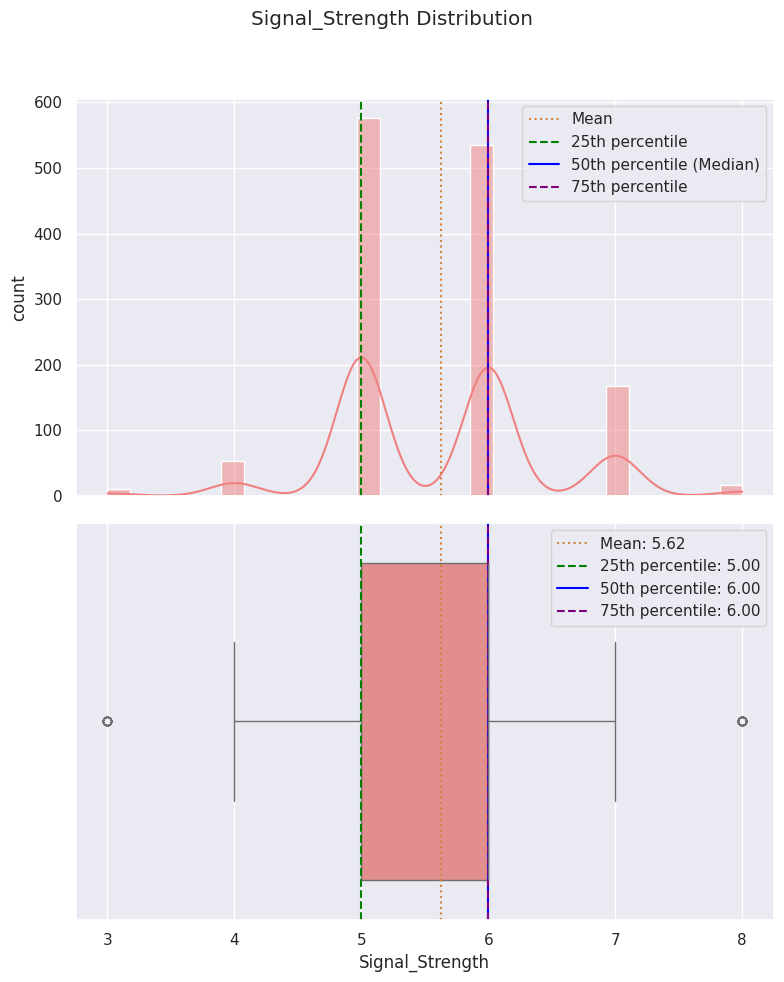

In [249]:
# Check Distribution of traget variable using box and hostogram
plot_histogram_and_boxplot(signal_df,'Signal_Strength','Signal_Strength','count','Signal_Strength Distribution')

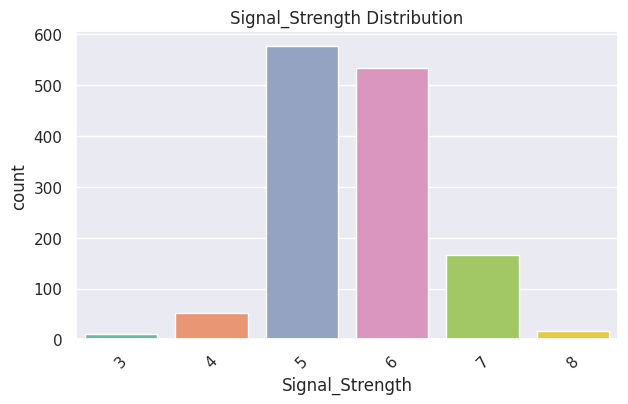

In [250]:
# Show count plot on signal strength
draw_count_plot(signal_df,'Signal_Strength','Signal_Strength','count','Signal_Strength Distribution');

In [251]:
# No of values on each signals strength
signal_df['Signal_Strength'].value_counts()

Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

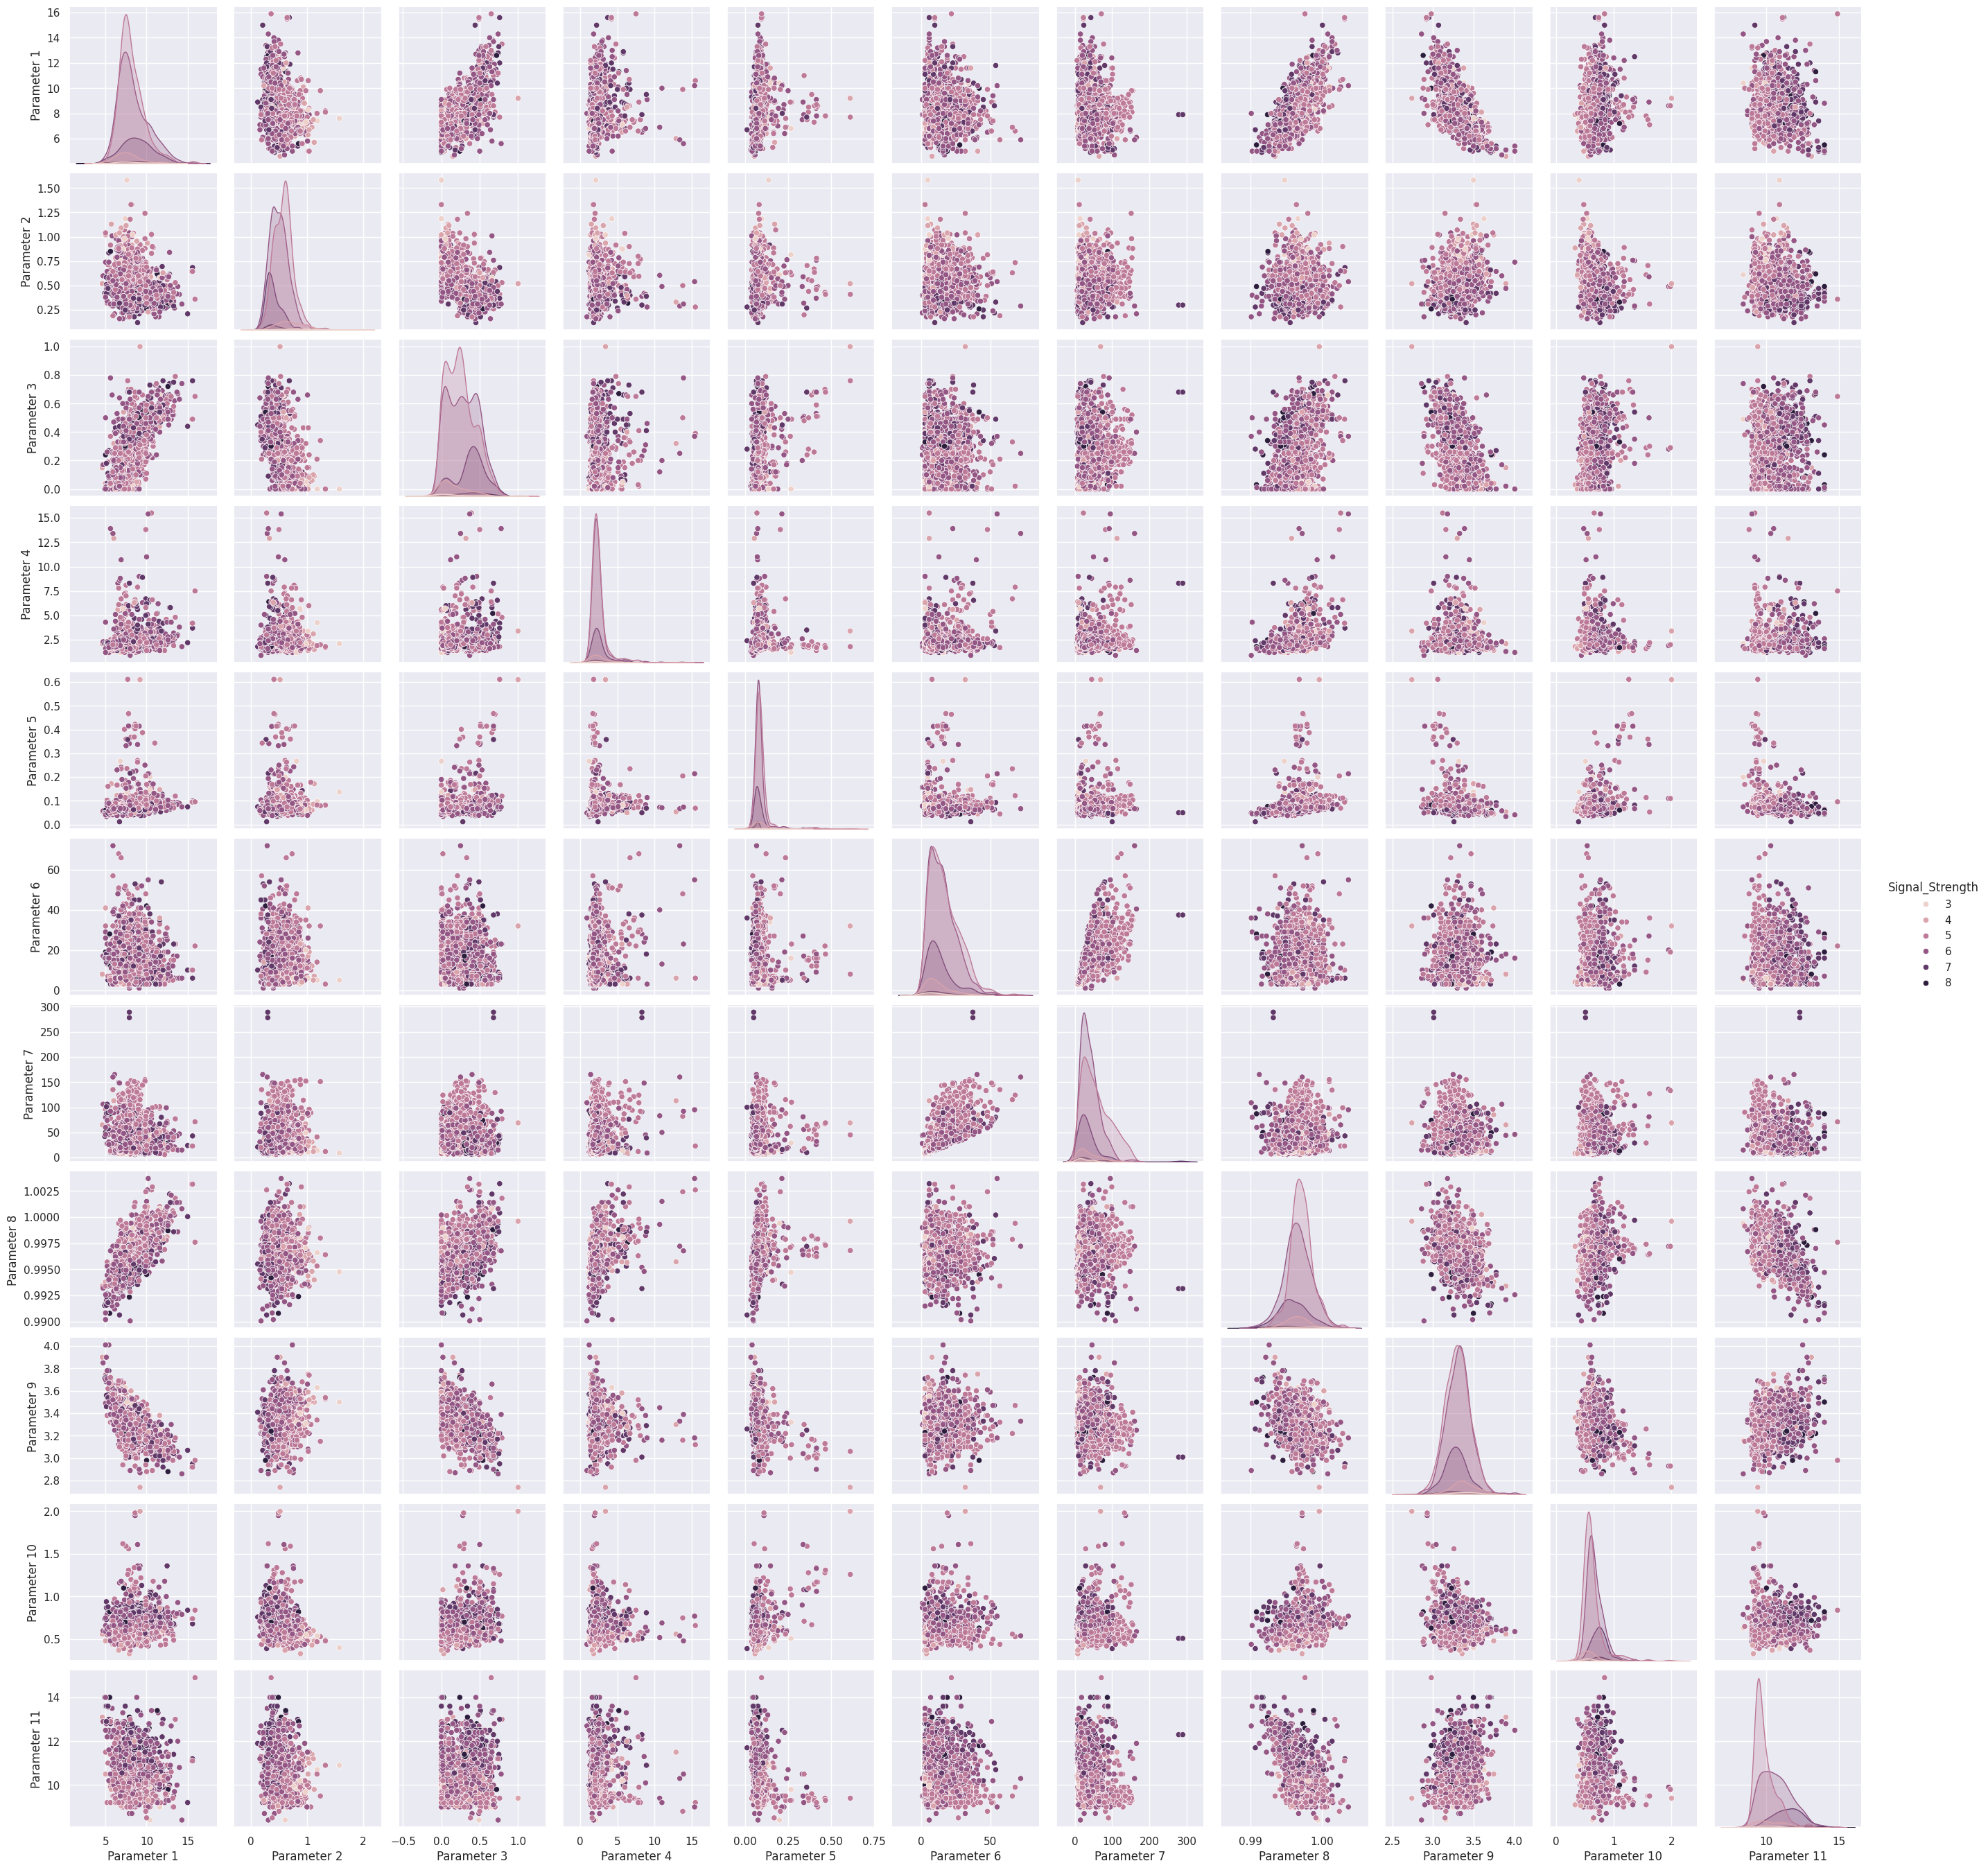

In [252]:
sns.pairplot(signal_df,hue='Signal_Strength');

There seems to be muticolinearity

#### Part A - Q2 A - Split the data into X & Y.


In [253]:
# Define mapping for ordinal encoding
signal_mapping = {3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}
# Apply mapping to the target column
signal_df["Signal_Strength"] = signal_df["Signal_Strength"].map(signal_mapping)

In [254]:

# Dropping traget columns and then assigning to X and Y
X = signal_df.drop(['Signal_Strength'],axis=1)
y = signal_df[['Signal_Strength']]

In [255]:
yc = to_categorical(y, num_classes=6)

#### Part A - Q2 B - Split the data into train & test with 70:30 proportion.


In [256]:
# Splitting the dataset into the Training and Testing set. Test set of 30% and training set if 70%
X_train, X_test, y_train, y_test = train_test_split(X,yc, test_size = 0.30, random_state = 0,stratify = y)

In [257]:
# Printing the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951, 6)
(408, 6)


In [258]:
# Divide test and validation set to make sure test data is unseen
Xv_train, X_val, yv_train, y_val = train_test_split(X_train,y_train, test_size = 0.20, random_state = 0,stratify = y_train)

In [259]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xv_train)  # Fit on training data
X_test_scaled = scaler.transform(X_val)  # Transform using same scaler
X_train_scaled_actual = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled_actual = scaler.transform(X_test)  # Transform using same scaler

In [260]:
no_of_classes=len(y_train[0])
print(f"No of classes {no_of_classes}")

No of classes 6


## **Model Building**

Buidling Model with one layer and relu activation for hidden layers softmax at the end

In [261]:
histories = []  # List to store history objects

noofneurons = [5, 7, 10,11]
for i in noofneurons:
    backend.clear_session()
    random.seed(32)
    tf.random.set_seed(32)
    print(f"Creating model for Single Layer with Neuron Count: {i}")

    model = Sequential()
    model = build_sequential_model(model, X_train_scaled.shape[1], no_of_classes, 1, layerNeuronCount=i)

    history = fit(model, X_train_scaled, yv_train, X_test_scaled, y_val, 50, 32, 2)

    histories.append((history, model,i))  # Store (history, model) tuple

Creating model for Single Layer with Neuron Count: 5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96 (384.00 B)

 Trainable params: 96 (384.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 51ms/step - accuracy: 0.1053 - loss: 2.5127 - val_accuracy: 0.1099 - val_loss: 2.4032
Epoch 2/50
24/24 - 0s - 16ms/step - accuracy: 0.1158 - loss: 2.4368 - val_accuracy: 0.1204 - val_loss: 2.3327
Epoch 3/50
24/24 - 0s - 11ms/step - accuracy: 0.1303 - loss: 2.3668 - val_accuracy: 0.1518 - val_loss: 2.2684
Epoch 4/50
24/24 - 0s - 13ms/step - accuracy: 0.1461 - loss: 2.3024 - val_accuracy: 0.1728 - val_loss: 2.2096
Epoch 5/50
24/24 - 0s - 9ms/step - accuracy: 0.1645 - loss: 2.2430 - val_accuracy: 0.1937 - val_loss: 2.1556
Epoch 6/50
24/24 - 0s - 13ms/step - accuracy: 0.1803 - loss: 2.1881 - val_accuracy: 0.2199 - val_loss: 2.1057
Epoch 7/50
24/24 - 0s - 13ms/step - accuracy: 0.2013 - loss: 2.1371 - val_accuracy: 0.2461 - val_loss: 2.0596
Epoch 8/50
24/24 - 0s - 12ms/step - accuracy: 0.2184 - loss: 2.0898 - val_accuracy: 0.2775 - val_loss: 2.0167
Epoch 9/50
24/24 - 0s - 9ms/step - accuracy: 0.2303 - loss: 2.0459 - val_accuracy: 0.2880 - val_loss: 1.9770
Epoch 1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              48 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132 (528.00 B)

 Trainable params: 132 (528.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 37ms/step - accuracy: 0.2263 - loss: 2.3249 - val_accuracy: 0.2827 - val_loss: 2.1094
Epoch 2/50
24/24 - 0s - 5ms/step - accuracy: 0.2342 - loss: 2.2553 - val_accuracy: 0.2932 - val_loss: 2.0524
Epoch 3/50
24/24 - 0s - 7ms/step - accuracy: 0.2434 - loss: 2.1898 - val_accuracy: 0.3141 - val_loss: 1.9991
Epoch 4/50
24/24 - 0s - 11ms/step - accuracy: 0.2579 - loss: 2.1285 - val_accuracy: 0.3351 - val_loss: 1.9491
Epoch 5/50
24/24 - 0s - 7ms/step - accuracy: 0.2724 - loss: 2.0712 - val_accuracy: 0.3455 - val_loss: 1.9025
Epoch 6/50
24/24 - 0s - 11ms/step - accuracy: 0.2816 - loss: 2.0176 - val_accuracy: 0.3665 - val_loss: 1.8589
Epoch 7/50
24/24 - 0s - 7ms/step - accuracy: 0.2947 - loss: 1.9673 - val_accuracy: 0.3770 - val_loss: 1.8180
Epoch 8/50
24/24 - 0s - 15ms/step - accuracy: 0.3105 - loss: 1.9203 - val_accuracy: 0.3979 - val_loss: 1.7797
Epoch 9/50
24/24 - 0s - 12ms/step - accuracy: 0.3171 - loss: 1.8763 - val_accuracy: 0.4031 - val_loss: 1.7439
Epoch 10/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186 (744.00 B)

 Trainable params: 186 (744.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 36ms/step - accuracy: 0.3039 - loss: 1.9454 - val_accuracy: 0.2042 - val_loss: 2.1287
Epoch 2/50
24/24 - 0s - 19ms/step - accuracy: 0.3158 - loss: 1.9012 - val_accuracy: 0.2147 - val_loss: 2.0839
Epoch 3/50
24/24 - 0s - 11ms/step - accuracy: 0.3276 - loss: 1.8598 - val_accuracy: 0.2304 - val_loss: 2.0423
Epoch 4/50
24/24 - 0s - 5ms/step - accuracy: 0.3368 - loss: 1.8216 - val_accuracy: 0.2461 - val_loss: 2.0036
Epoch 5/50
24/24 - 0s - 6ms/step - accuracy: 0.3434 - loss: 1.7860 - val_accuracy: 0.2618 - val_loss: 1.9674
Epoch 6/50
24/24 - 0s - 7ms/step - accuracy: 0.3592 - loss: 1.7530 - val_accuracy: 0.2670 - val_loss: 1.9337
Epoch 7/50
24/24 - 0s - 11ms/step - accuracy: 0.3724 - loss: 1.7224 - val_accuracy: 0.2723 - val_loss: 1.9022
Epoch 8/50
24/24 - 0s - 7ms/step - accuracy: 0.3855 - loss: 1.6938 - val_accuracy: 0.2880 - val_loss: 1.8728
Epoch 9/50
24/24 - 0s - 5ms/step - accuracy: 0.3855 - loss: 1.6671 - val_accuracy: 0.2984 - val_loss: 1.8453
Epoch 10/5

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204 (816.00 B)

 Trainable params: 204 (816.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 37ms/step - accuracy: 0.3513 - loss: 1.6571 - val_accuracy: 0.3822 - val_loss: 1.5593
Epoch 2/50
24/24 - 0s - 6ms/step - accuracy: 0.3697 - loss: 1.6159 - val_accuracy: 0.3927 - val_loss: 1.5252
Epoch 3/50
24/24 - 0s - 12ms/step - accuracy: 0.3882 - loss: 1.5779 - val_accuracy: 0.4136 - val_loss: 1.4941
Epoch 4/50
24/24 - 0s - 6ms/step - accuracy: 0.4013 - loss: 1.5430 - val_accuracy: 0.4188 - val_loss: 1.4658
Epoch 5/50
24/24 - 0s - 5ms/step - accuracy: 0.4158 - loss: 1.5110 - val_accuracy: 0.4346 - val_loss: 1.4399
Epoch 6/50
24/24 - 0s - 6ms/step - accuracy: 0.4197 - loss: 1.4817 - val_accuracy: 0.4607 - val_loss: 1.4163
Epoch 7/50
24/24 - 0s - 6ms/step - accuracy: 0.4237 - loss: 1.4547 - val_accuracy: 0.4764 - val_loss: 1.3948
Epoch 8/50
24/24 - 0s - 6ms/step - accuracy: 0.4329 - loss: 1.4300 - val_accuracy: 0.4817 - val_loss: 1.3752
Epoch 9/50
24/24 - 0s - 5ms/step - accuracy: 0.4434 - loss: 1.4073 - val_accuracy: 0.4764 - val_loss: 1.3573
Epoch 10/50


ploting for single layer with no of neuron 5


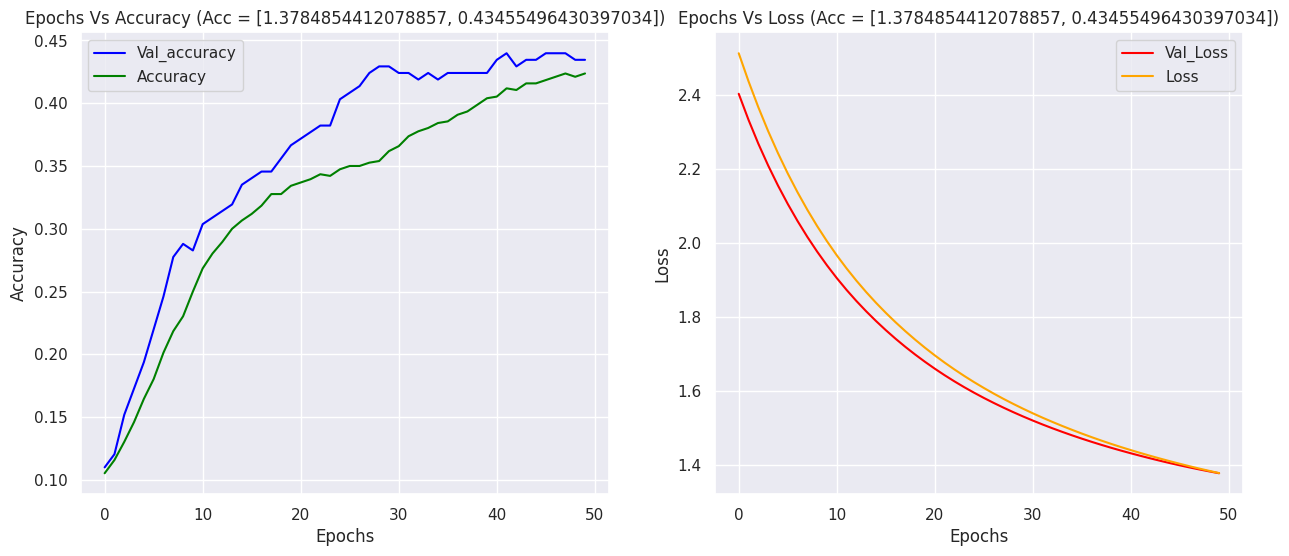

ploting for single layer with no of neuron 7


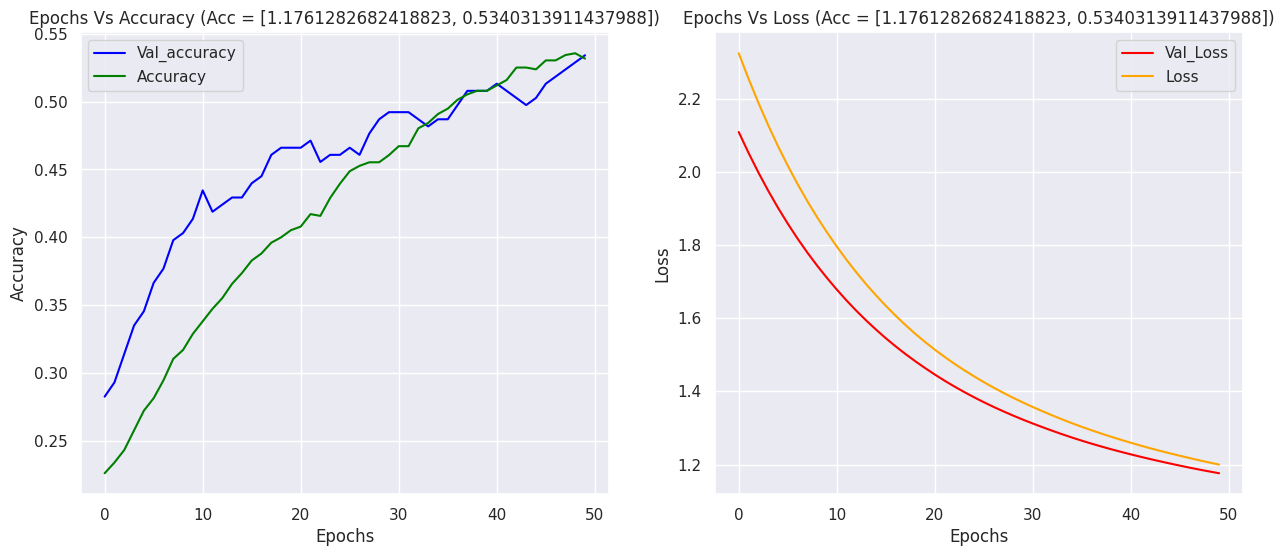

ploting for single layer with no of neuron 10


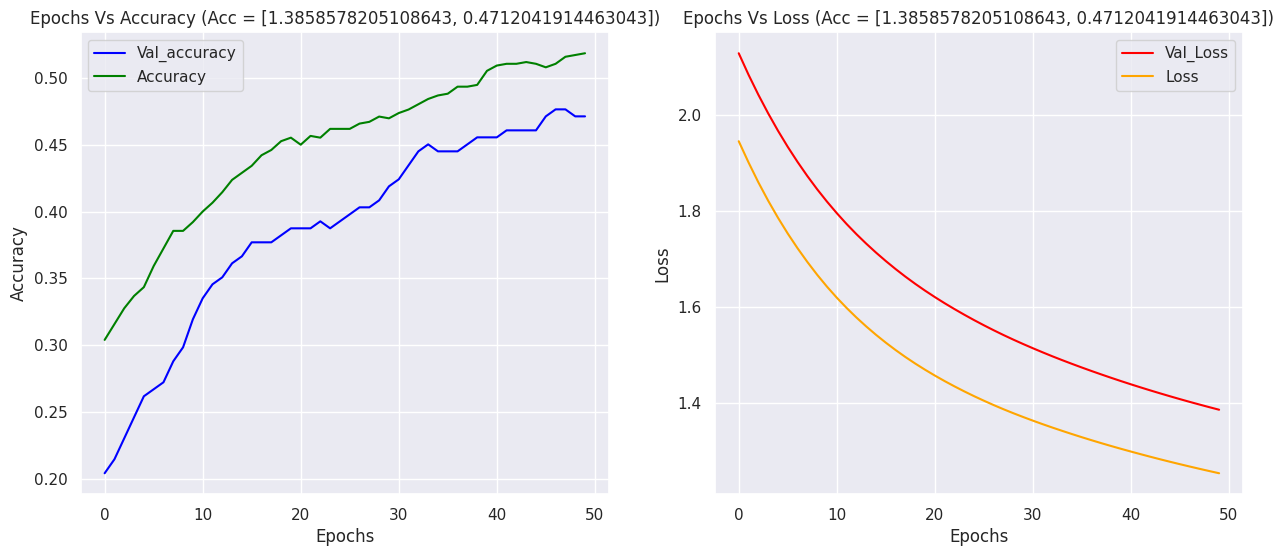

ploting for single layer with no of neuron 11


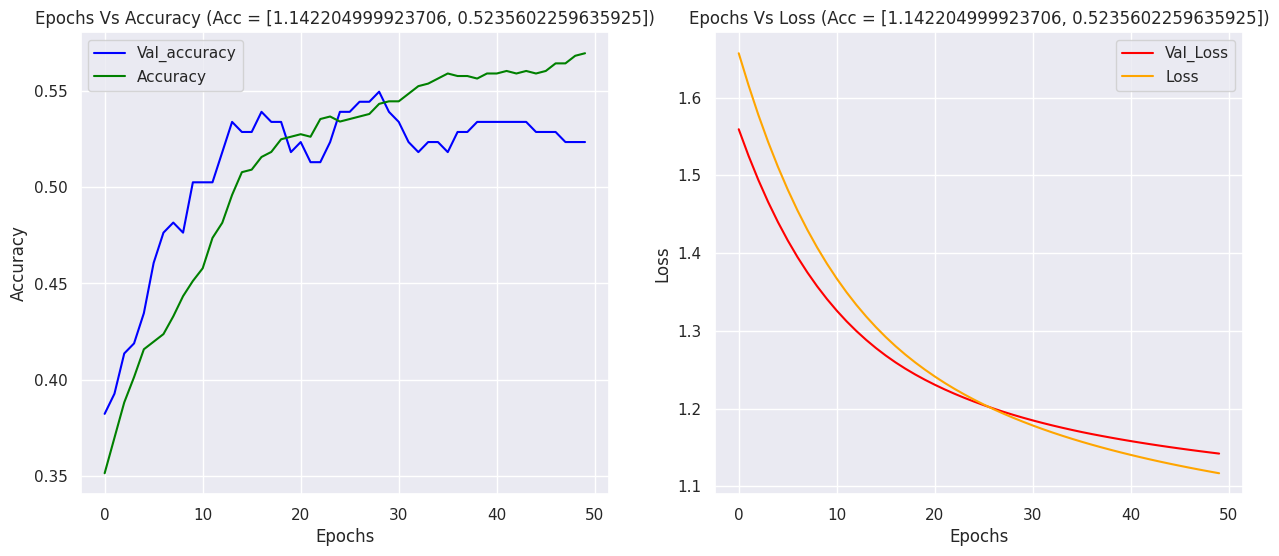

In [262]:
# Now plot all models at once
for history, model, neurons in histories:
    print(f"ploting for single layer with no of neuron {neurons}")
    plot_model_accuracy(history, model)

### Observations:
- From the above plot we can see acuracy is 57% with 64 neurons and lowest (43%) at 5 neurons .
- Better convergance with nof of neurons 16 and accuracy of 52%
- This is a single layer neural network.We will check adding more layers and see if there will be any change

Model After Adding some More layers

In [263]:
histories = []  # List to store history objects

layerNeuronCount = [2,4,6,8]
for i in layerNeuronCount:
    backend.clear_session()
    random.seed(32)
    tf.random.set_seed(32)
    print(f"Creating model for Single Layer with Neuron Count: {i}")

    model = Sequential()
    model = build_sequential_model(model, X_train_scaled.shape[1], no_of_classes,layerRepeatCount=i,layerNeuronCount=10)

    history = fit(model, X_train_scaled, yv_train, X_test_scaled, y_val, 50, 32, 2)

    histories.append((history, model,i))  # Store (history, model) tuple

Creating model for Single Layer with Neuron Count: 2


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 296 (1.16 KB)

 Trainable params: 296 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 1s - 49ms/step - accuracy: 0.0592 - loss: 2.3935 - val_accuracy: 0.0628 - val_loss: 2.2370
Epoch 2/50
24/24 - 0s - 19ms/step - accuracy: 0.0658 - loss: 2.2562 - val_accuracy: 0.0838 - val_loss: 2.1300
Epoch 3/50
24/24 - 0s - 11ms/step - accuracy: 0.0855 - loss: 2.1447 - val_accuracy: 0.1099 - val_loss: 2.0451
Epoch 4/50
24/24 - 0s - 6ms/step - accuracy: 0.1039 - loss: 2.0540 - val_accuracy: 0.1361 - val_loss: 1.9755
Epoch 5/50
24/24 - 0s - 12ms/step - accuracy: 0.1289 - loss: 1.9788 - val_accuracy: 0.1571 - val_loss: 1.9171
Epoch 6/50
24/24 - 0s - 6ms/step - accuracy: 0.1553 - loss: 1.9157 - val_accuracy: 0.1885 - val_loss: 1.8671
Epoch 7/50
24/24 - 0s - 6ms/step - accuracy: 0.1868 - loss: 1.8618 - val_accuracy: 0.2042 - val_loss: 1.8236
Epoch 8/50
24/24 - 0s - 7ms/step - accuracy: 0.2132 - loss: 1.8148 - val_accuracy: 0.2304 - val_loss: 1.7851
Epoch 9/50
24/24 - 0s - 5ms/step - accuracy: 0.2526 - loss: 1.7736 - val_accuracy: 0.2304 - val_loss: 1.7512
Epoch 10/5

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 516 (2.02 KB)

 Trainable params: 516 (2.02 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 2s - 75ms/step - accuracy: 0.3592 - loss: 2.0865 - val_accuracy: 0.3508 - val_loss: 2.0617
Epoch 2/50
24/24 - 0s - 11ms/step - accuracy: 0.3553 - loss: 1.9392 - val_accuracy: 0.3455 - val_loss: 1.9400
Epoch 3/50
24/24 - 0s - 13ms/step - accuracy: 0.3605 - loss: 1.8438 - val_accuracy: 0.3508 - val_loss: 1.8572
Epoch 4/50
24/24 - 0s - 9ms/step - accuracy: 0.3724 - loss: 1.7757 - val_accuracy: 0.3508 - val_loss: 1.7949
Epoch 5/50
24/24 - 0s - 12ms/step - accuracy: 0.3842 - loss: 1.7227 - val_accuracy: 0.3508 - val_loss: 1.7454
Epoch 6/50
24/24 - 0s - 13ms/step - accuracy: 0.3934 - loss: 1.6791 - val_accuracy: 0.3560 - val_loss: 1.7038
Epoch 7/50
24/24 - 0s - 8ms/step - accuracy: 0.4079 - loss: 1.6416 - val_accuracy: 0.3665 - val_loss: 1.6678
Epoch 8/50
24/24 - 0s - 11ms/step - accuracy: 0.4211 - loss: 1.6085 - val_accuracy: 0.3770 - val_loss: 1.6360
Epoch 9/50
24/24 - 0s - 12ms/step - accuracy: 0.4368 - loss: 1.5786 - val_accuracy: 0.3927 - val_loss: 1.6067
Epoch 1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 736 (2.88 KB)

 Trainable params: 736 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 2s - 65ms/step - accuracy: 0.4250 - loss: 2.3838 - val_accuracy: 0.4188 - val_loss: 1.8588
Epoch 2/50
24/24 - 0s - 15ms/step - accuracy: 0.4211 - loss: 1.7860 - val_accuracy: 0.4136 - val_loss: 1.6628
Epoch 3/50
24/24 - 0s - 13ms/step - accuracy: 0.4145 - loss: 1.6399 - val_accuracy: 0.4136 - val_loss: 1.5780
Epoch 4/50
24/24 - 0s - 12ms/step - accuracy: 0.4197 - loss: 1.5612 - val_accuracy: 0.4188 - val_loss: 1.5200
Epoch 5/50
24/24 - 0s - 11ms/step - accuracy: 0.4224 - loss: 1.5043 - val_accuracy: 0.4241 - val_loss: 1.4751
Epoch 6/50
24/24 - 0s - 9ms/step - accuracy: 0.4276 - loss: 1.4588 - val_accuracy: 0.4241 - val_loss: 1.4387
Epoch 7/50
24/24 - 0s - 8ms/step - accuracy: 0.4224 - loss: 1.4210 - val_accuracy: 0.4241 - val_loss: 1.4082
Epoch 8/50
24/24 - 0s - 8ms/step - accuracy: 0.4092 - loss: 1.3886 - val_accuracy: 0.4398 - val_loss: 1.3819
Epoch 9/50
24/24 - 0s - 13ms/step - accuracy: 0.4158 - loss: 1.3612 - val_accuracy: 0.4503 - val_loss: 1.3596
Epoch 10

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 956 (3.73 KB)

 Trainable params: 956 (3.73 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
24/24 - 2s - 70ms/step - accuracy: 0.3276 - loss: 1.5035 - val_accuracy: 0.3455 - val_loss: 1.4814
Epoch 2/50
24/24 - 0s - 16ms/step - accuracy: 0.3329 - loss: 1.4210 - val_accuracy: 0.3351 - val_loss: 1.4425
Epoch 3/50
24/24 - 0s - 12ms/step - accuracy: 0.3237 - loss: 1.3892 - val_accuracy: 0.3351 - val_loss: 1.4143
Epoch 4/50
24/24 - 0s - 15ms/step - accuracy: 0.3250 - loss: 1.3650 - val_accuracy: 0.3403 - val_loss: 1.3925
Epoch 5/50
24/24 - 0s - 12ms/step - accuracy: 0.3237 - loss: 1.3449 - val_accuracy: 0.3298 - val_loss: 1.3747
Epoch 6/50
24/24 - 0s - 12ms/step - accuracy: 0.3316 - loss: 1.3278 - val_accuracy: 0.3298 - val_loss: 1.3598
Epoch 7/50
24/24 - 0s - 14ms/step - accuracy: 0.3329 - loss: 1.3125 - val_accuracy: 0.3194 - val_loss: 1.3466
Epoch 8/50
24/24 - 0s - 11ms/step - accuracy: 0.3276 - loss: 1.2988 - val_accuracy: 0.3298 - val_loss: 1.3350
Epoch 9/50
24/24 - 0s - 13ms/step - accuracy: 0.3263 - loss: 1.2867 - val_accuracy: 0.3298 - val_loss: 1.3243
Epoch

ploting for 2 layers with no of neuron 10


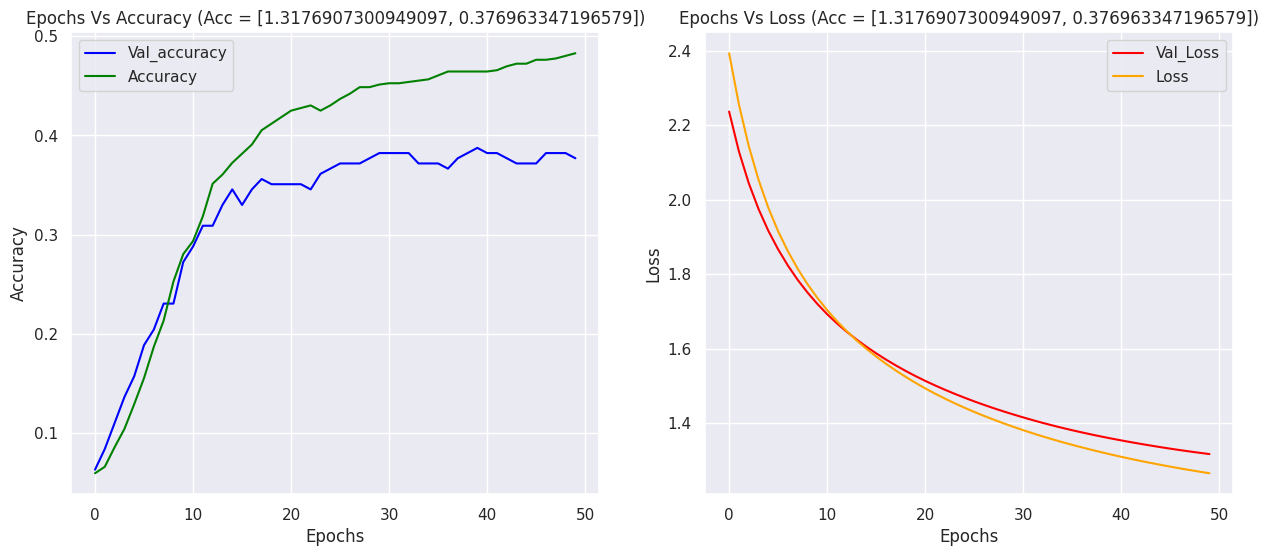

ploting for 4 layers with no of neuron 10


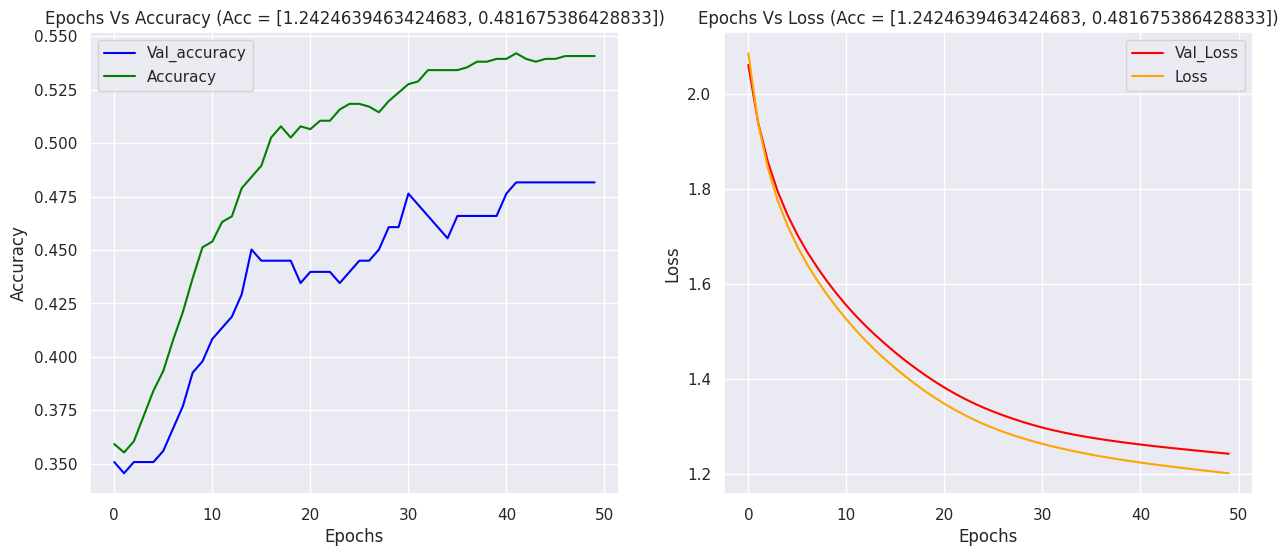

ploting for 6 layers with no of neuron 10


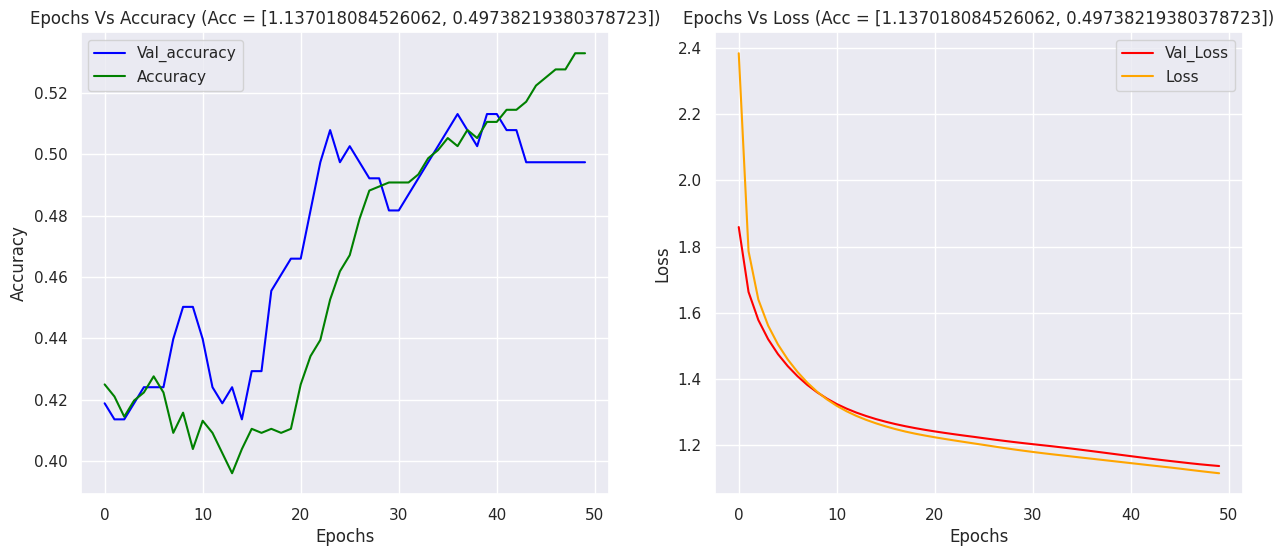

ploting for 8 layers with no of neuron 10


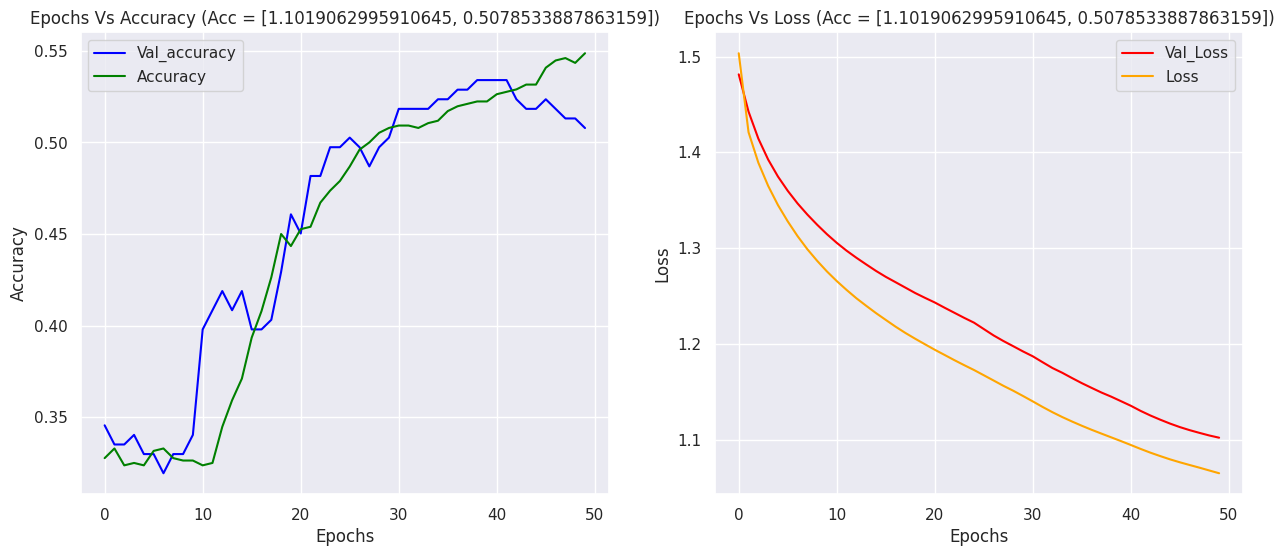

In [264]:
# Now plot all models at once
for history, model, layers in histories:
    print(f"ploting for {layers} layers with no of neuron 10")
    plot_model_accuracy(history, model)

### Observations:
- Highest accuracy is with 2 layers around 50%
-  The accurcay curve is not smooth so much of variation

### Model-2 With DropOut

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/120
6/6 - 1s - 193ms/step - accuracy: 0.1566 - loss: 2.1229 - val_accuracy: 0.1414 - val_loss: 2.0612
Epoch 2/120
6/6 - 0s - 63ms/step - accuracy: 0.1539 - loss: 2.1337 - val_accuracy: 0.1466 - val_loss: 2.0387
Epoch 3/120
6/6 - 0s - 22ms/step - accuracy: 0.1592 - loss: 2.0402 - val_accuracy: 0.1518 - val_loss: 2.0165
Epoch 4/120
6/6 - 0s - 26ms/step - accuracy: 0.1461 - loss: 2.0518 - val_accuracy: 0.1571 - val_loss: 1.9954
Epoch 5/120
6/6 - 0s - 16ms/step - accuracy: 0.1579 - loss: 2.0558 - val_accuracy: 0.1623 - val_loss: 1.9759
Epoch 6/120
6/6 - 0s - 17ms/step - accuracy: 0.1711 - loss: 2.0091 - val_accuracy: 0.1675 - val_loss: 1.9573
Epoch 7/120
6/6 - 0s - 16ms/step - accuracy: 0.1750 - loss: 2.0125 - val_accuracy: 0.1728 - val_loss: 1.9390
Epoch 8/120
6/6 - 0s - 16ms/step - accuracy: 0.1566 - loss: 2.0192 - val_accuracy: 0.1728 - val_loss: 1.9216
Epoch 9/120
6/6 - 0s - 16ms/step - accuracy: 0.1750 - loss: 1.9867 - val_accuracy: 0.1832 - val_loss: 1.9047
Epoch 10/120


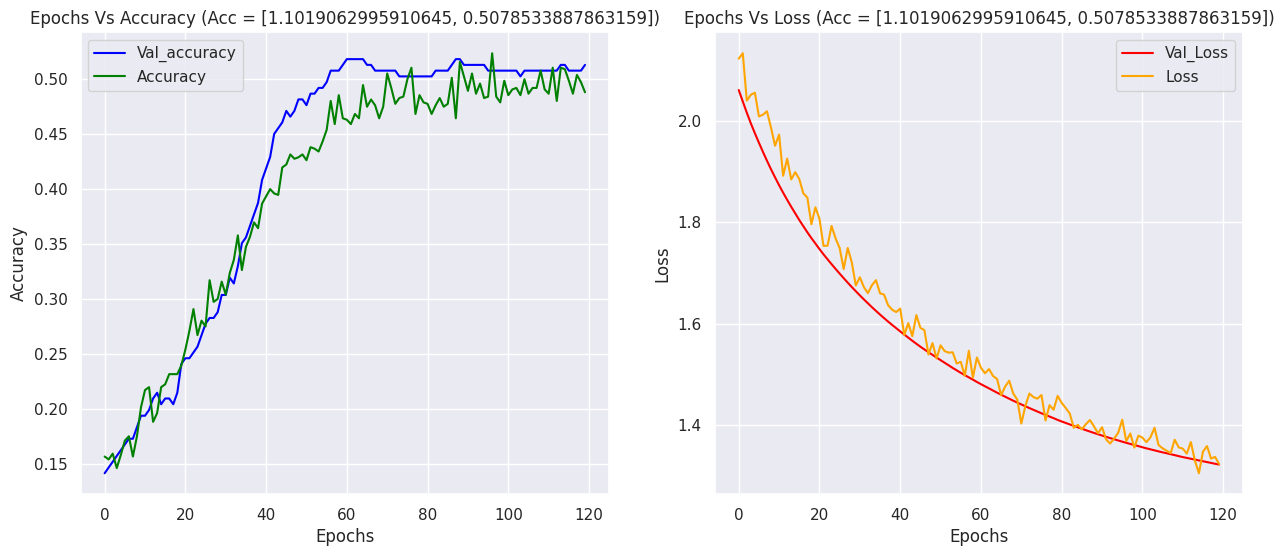

In [266]:
# Try SGD Optimizer  with 120 epoch

backend.clear_session()
#Fixing the seed for random number generators for same output
random.seed(42)
tf.random.set_seed(42)

model2 = Sequential()
model2.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(6, activation = 'softmax'))

compile_model(model2,optimizer_type='sgd')

print(model2.summary())

history = model2.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=120, batch_size=128, verbose=2)
model2.test_accuracy = model.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model2)

### Observations:
- We can see the cirve with training set is jumping up and down as we have introduced dropout
- Not much improvement with drop out .(.51)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/120
6/6 - 2s - 357ms/step - accuracy: 0.1566 - loss: 2.1046 - val_accuracy: 0.1518 - val_loss: 2.0290
Epoch 2/120
6/6 - 0s - 24ms/step - accuracy: 0.1579 - loss: 2.0811 - val_accuracy: 0.1518 - val_loss: 1.9830
Epoch 3/120
6/6 - 0s - 55ms/step - accuracy: 0.1684 - loss: 1.9595 - val_accuracy: 0.1675 - val_loss: 1.9413
Epoch 4/120
6/6 - 0s - 46ms/step - accuracy: 0.1658 - loss: 1.9545 - val_accuracy: 0.1728 - val_loss: 1.9031
Epoch 5/120
6/6 - 0s - 51ms/step - accuracy: 0.1868 - loss: 1.9323 - val_accuracy: 0.1832 - val_loss: 1.8685
Epoch 6/120
6/6 - 0s - 54ms/step - accuracy: 0.2039 - loss: 1.8735 - val_accuracy: 0.1937 - val_loss: 1.8370
Epoch 7/120
6/6 - 0s - 42ms/step - accuracy: 0.2184 - loss: 1.8529 - val_accuracy: 0.2199 - val_loss: 1.8074
Epoch 8/120
6/6 - 0s - 19ms/step - accuracy: 0.2303 - loss: 1.8412 - val_accuracy: 0.2147 - val_loss: 1.7799
Epoch 9/120
6/6 - 0s - 23ms/step - accuracy: 0.2539 - loss: 1.7976 - val_accuracy: 0.2408 - val_loss: 1.7545
Epoch 10/120


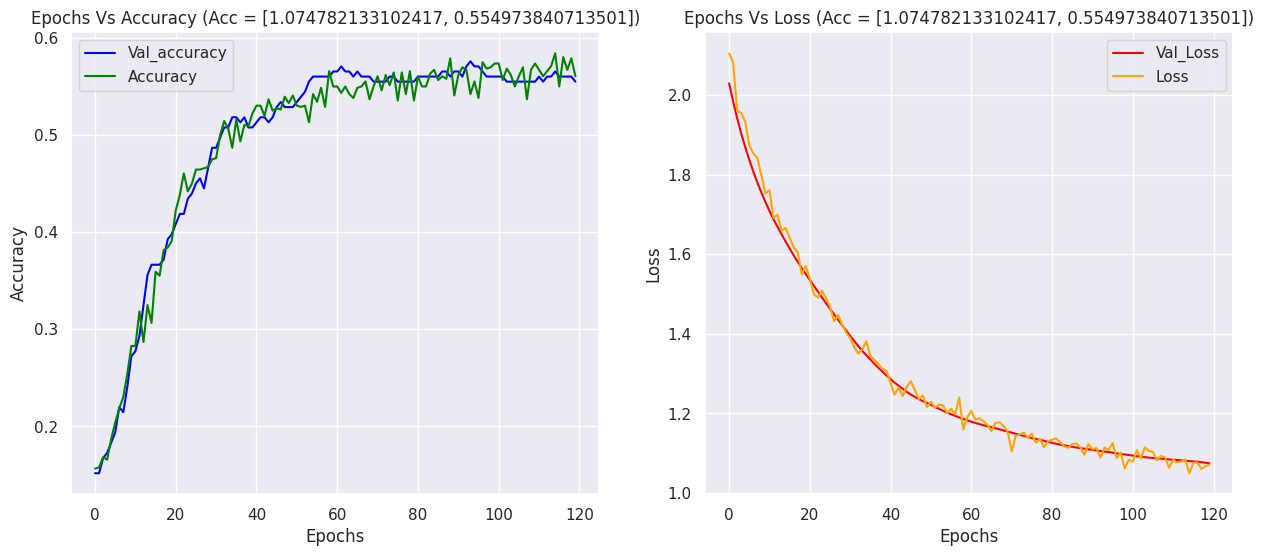

In [267]:
# Try adam Optimizer instead with 120 epoch

backend.clear_session()
#Fixing the seed for random number generators for same output
random.seed(42)
tf.random.set_seed(42)

model_adam= Sequential()
model_adam.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model_adam.add(Dropout(0.2))
model_adam.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model_adam.add(Dropout(0.2))
model_adam.add(Dense(6, activation = 'softmax'))

compile_model(model_adam,optimizer_type='adam')

print(model_adam.summary())

history = model_adam.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=120, batch_size=128, verbose=2)
model_adam.test_accuracy = model_adam.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model_adam)

### Obsevations:
-  With adam the accuracy is bit better around 55% (highest Till Now)

#### Taking the whole dataset as we have less records in signal dataset i.e around 1300 .So may be we need a bigger sample .
-  We will do validation on y-test instaed of having seperate sample for it

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators for same output
random.seed(42)
tf.random.set_seed(42)

model_adam= Sequential()
model_adam.add(Dense(11,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model_adam.add(Dropout(0.2))
model_adam.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model_adam.add(Dropout(0.2))
model_adam.add(Dense(6, activation = 'softmax'))

compile_model(model_adam,optimizer_type='adam')

print(model_adam.summary())

history = model_adam.fit(X_train_scaled_actual, y_train, validation_data= [X_test_scaled_actual, y_test], epochs=350, batch_size=128, verbose=2)
model_adam.test_accuracy = model_adam.evaluate(X_test_scaled_actual, y_test, verbose = 1)
plot_model_accuracy(history, model_adam)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/350
8/8 - 3s - 378ms/step - accuracy: 0.1462 - loss: 2.1149 - val_accuracy: 0.1176 - val_loss: 1.9236
Epoch 2/350
8/8 - 0s - 46ms/step - accuracy: 0.1588 - loss: 2.0703 - val_accuracy: 0.1201 - val_loss: 1.8694
Epoch 3/350
8/8 - 1s - 72ms/step - accuracy: 0.1483 - loss: 1.9999 - val_accuracy: 0.1373 - val_loss: 1.8217
Epoch 4/350
8/8 - 0s - 58ms/step - accuracy: 0.1945 - loss: 1.9476 - val_accuracy: 0.1667 - val_loss: 1.7806
Epoch 5/350
8/8 - 0s - 52ms/step - accuracy: 0.2387 - loss: 1.8992 - val_accuracy: 0.1814 - val_loss: 1.7438
Epoch 6/350
8/8 - 0s - 42ms/step - accuracy: 0.2187 - loss: 1.8592 - val_accuracy: 0.2255 - val_loss: 1.7109
Epoch 7/350
8/8 - 1s - 79ms/step - accuracy: 0.2429 - loss: 1.7896 - val_accuracy: 0.2623 - val_loss: 1.6812
Epoch 8/350
8/8 - 0s - 46ms/step - accuracy: 0.2545 - loss: 1.7827 - val_accuracy: 0.2843 - val_loss: 1.6543
Epoch 9/350
8/8 - 0s - 41ms/step - accuracy: 0.2913 - loss: 1.7226 - val_accuracy: 0.2990 - val_loss: 1.6287
Epoch 10/350


### Observation:
- We can see with whole dataset i.e with validation set seperately model performnace is better around 58% increase of 3%
-  There are some up and downs

In [ ]:
model

Model 3 (Batch Normalization)

In [ ]:
backend.clear_session()

random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(16,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'softmax'))

compile_model(model,optimizer_type='adam')

print(model.summary())
history = model.fit(X_train_scaled, yv_train, validation_data= [X_test_scaled, y_val], epochs=120, batch_size=64, verbose=2)
model.test_accuracy = model.evaluate(X_test_scaled, y_val, verbose = 1)
plot_model_accuracy(history, model)

- Though it's better then drop out but overall there is not much improvemnet on accuracy which is at .55.This we had already achieved with 2 layers.

### Model 4 (Trying 4 Layers with no of neurons as 32 in hidden layer)



### Model Optimzation Random Search CV

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v4,lr=0.01, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[16,32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random_search= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    n_iter=500,
                    cv=kfold_splits,
                    param_distributions=param_random,n_jobs=-1)

In [ ]:
# random_result = random_search.fit(X_train_scaled_rs, y_train,validation_split=0.2,verbose=1)

# # Summarize results
# print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
# means = random_result.cv_results_['mean_test_score']
# stds = random_result.cv_results_['std_test_score']
# params = random_result.cv_results_['params']

### Observations:
 No improvement with Ramdom search CV as accuracy is quite less